In [2]:
import jpype

jpype.startJVM(jpype.getDefaultJVMPath())

In [3]:
import pickle as pkl
import os
import matplotlib.pyplot as plt
from matplotlib.ticker import FormatStrFormatter, AutoMinorLocator, LogLocator
import numpy as np
import pandas as pd
from scipy.fft import rfft, rfftfreq
from scipy.signal import chirp as chirpsig
from scipy.signal import find_peaks as find_peaks
from scipy.signal import get_window


<frozen importlib._bootstrap>:241: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject


Text(0.5, 0.98, 'BXSCAL Spill Monitor FFTs for new SlowEx RFKO Signal Generator')

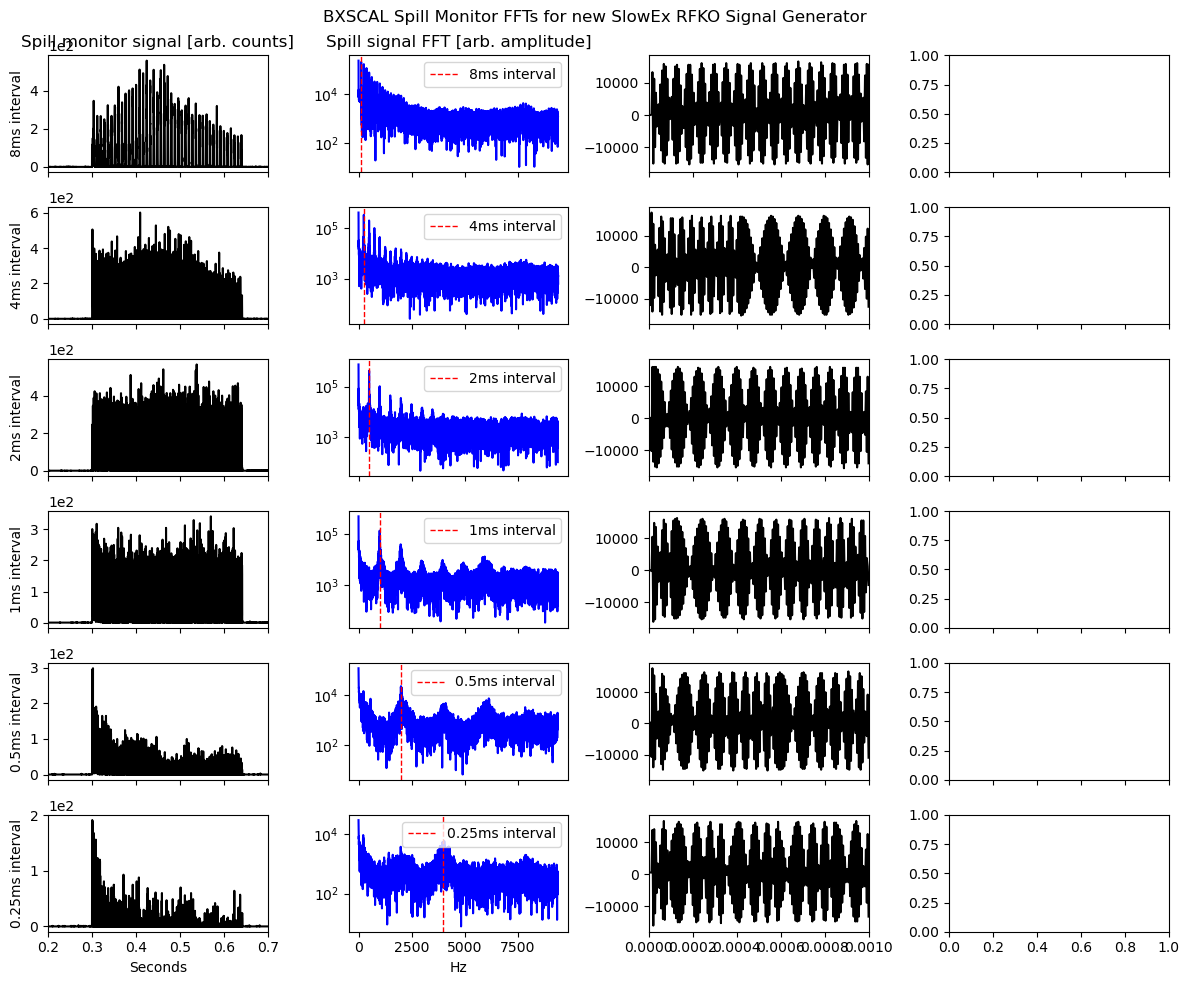

In [63]:
#def generate_fft_plot(dir, interval_list):
#########
dir = '../results/new_scope/2022-11-23T13:59:33'
interval_list = [8, 4, 2, 1, .5, .25]
#########

files = os.listdir(dir)

scope0_files = [f for f in files if f.startswith('scope0') and f.endswith('.pkl')]
scope1_files = [f for f in files if f.startswith('scope1') and f.endswith('.pkl')]
cal1101_files = [f for f in files if f.startswith('BXSCAL_1101') and f.endswith('.pkl')]
cal1100_files = [f for f in files if f.startswith('BXSCAL_1100') and f.endswith('.pkl')]

scope0_files.sort()
scope1_files.sort()
cal1101_files.sort()
cal1100_files.sort()

scope0 = [pkl.load(open(f"{dir}/{f}", 'rb')) for f in scope0_files[1:]]
scope1 = [pkl.load(open(f"{dir}/{f}", 'rb')) for f in scope1_files[1:]]
cal1101 = [pkl.load(open(f"{dir}/{f}", 'rb')) for f in cal1101_files[1:]]
cal1100 = [pkl.load(open(f"{dir}/{f}", 'rb')) for f in cal1100_files[1:]]

fig, ax = plt.subplots(len(cal1100)-1, 4, figsize=(12, 10), sharex='col', tight_layout=True)

for i, (cal0, cal1, scp, interval) in enumerate(list(zip(cal1100, cal1101, scope1, interval_list))):

    cal0_data = np.abs(cal0['deltaCountArray']) + np.abs(cal1['deltaCountArray']) #sum the two scintillators
    cal0_time = cal0['timeArray']

    sum = 0
    for j in range(len(cal0_time)-1):
        sum += (cal0_time[j+1] - cal0_time[j]) * 1e-6
    fifofreq = 1/(sum/len(cal0_time)) # find average FiFo frequency

    int_time_reconstructed = (cal0_time - cal0_time[0])*1e-6 # convert microsecond UNIX timestamp to offset in seconds
    ax[i, 0].plot(int_time_reconstructed, cal0_data, 'k')
    ax[i, 0].ticklabel_format(style='sci', axis='y', scilimits=(0, 0))
    ax[i, 0].set_xlim(.2, .7)

    cal0_yf = rfft(cal0_data)
    cal0_xf = rfftfreq(len(cal0_data), 1/fifofreq)
    ax[i, 1].plot(cal0_xf, np.abs(cal0_yf), 'b')
    ax[i, 1].ticklabel_format(style='sci', axis='y', scilimits=(0, 0))
    ax[i, 1].set_yscale('log')

    ax[i, 1].axvline(x=1/(interval*1e-3), color='r', linestyle='--', linewidth=1, label=f'{interval}ms interval')
    ax[i, 1].legend()

    ax[i, 0].set_ylabel(f'{interval}ms interval')

    ax[i, 2].plot(scp[0]['time']*1e-9, scp[0]['value'], 'k')
    ax[i, 2].set_xlim(0, .001)


    

ax[0, 0].set_title('Spill monitor signal [arb. counts]')
ax[0, 1].set_title('Spill signal FFT [arb. amplitude]')

ax[i, 0].set_xlabel("Seconds")
ax[i, 1].set_xlabel("Hz")

plt.tight_layout(pad=0.8, w_pad=0.1, h_pad=0.4)

plt.suptitle("BXSCAL Spill Monitor FFTs for new SlowEx RFKO Signal Generator")


In [57]:
scp[0]['time']*1e-9

array([0.000000e+00, 4.000032e-06, 8.000064e-06, ..., 4.999920e-01,
       4.999960e-01, 5.000000e-01])

(0.0, 5000.0)

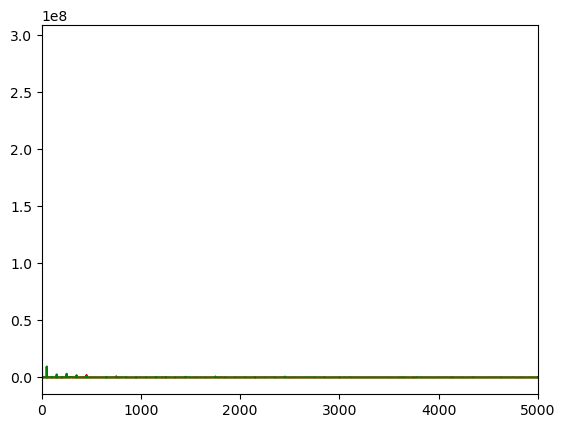

In [53]:
fig, ax = plt.subplots()



scp = scope1[2]
scp_yf = rfft(scp[0]['value'])
time_diff = np.mean(np.diff(scp[0]['time']*1e-9))
scp_xf = rfftfreq(len(scp[0]['value']), time_diff)
ax.plot(scp_xf, np.abs(scp_yf), 'r')

scp = scope0[2]
scp_yf = rfft(scp[0]['value'])
time_diff = np.mean(np.diff(scp[0]['time']*1e-9))
scp_xf = rfftfreq(len(scp[0]['value']), time_diff)
ax.plot(scp_xf, np.abs(scp_yf), 'g')

ax.set_xlim(0, 5000)

In [35]:
# time difference
time_array = scp[0]['time']*1e-9
time_diff = np.diff(time_array)
time_diff

array([4.000032e-06, 4.000032e-06, 4.000032e-06, ..., 4.000032e-06,
       4.000032e-06, 4.000032e-06])

Text(0.5, -0.13, 'Gain')

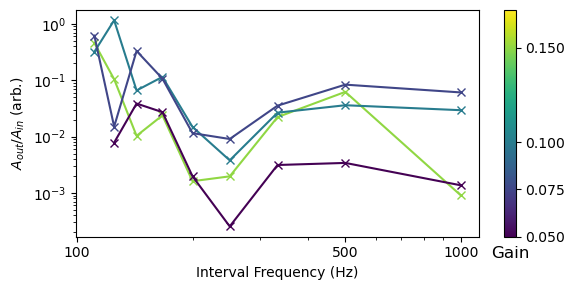

In [14]:
import matplotlib as mpl
fig, ax = plt.subplots(1, 1, figsize=(6, 3), tight_layout=True)
cmap = plt.get_cmap('viridis')
# ax.plot(tf_df['Frequency'], tf_df['Spill'], 'r')
# ax.plot(tf_df['Frequency'], tf_df['Damper'], 'g')
norm = mpl.colors.Normalize(vmin=0.05, vmax=0.17)
ax.plot(tf_df_15['Frequency'], tf_df_15['Spill']/tf_df_15['Damper'], 'x-', label='Gain: 0.15', c=cmap(norm(0.15)))
ax.plot(tf_df_1['Frequency'], tf_df_1['Spill']/tf_df_1['Damper'], 'x-', label='Gain: 0.1', c=cmap(norm(0.1)))
ax.plot(tf_df_75['Frequency'], tf_df_75['Spill']/tf_df_75['Damper'], 'x-', label='Gain: 0.075', c=cmap(norm(0.075)))
ax.plot(tf_df_5['Frequency'], tf_df_5['Spill']/tf_df_5['Damper'], 'x-', label='Gain: 0.05', c=cmap(norm(0.05)))


ax.set_xscale('log')
ax.set_yscale('log')
#ax.legend(loc='upper right', ncol=2)
ax.set_xticks([100, 500, 1000])
ax.set_xticklabels([100, 500, 1000])
ax.set_xlabel('Interval Frequency (Hz)')
ax.set_ylabel(r'$A_{out}/A_{in}$ (arb.)')


sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])
cb = plt.colorbar(sm,
             ticks = [0.05, 0.075, 0.1, 0.15])
cb.ax.set_title('Gain', y=-0.13)

#ax.set_title('Fixed Amplitude Transfer Function\nof RFKO Slow Extraction')

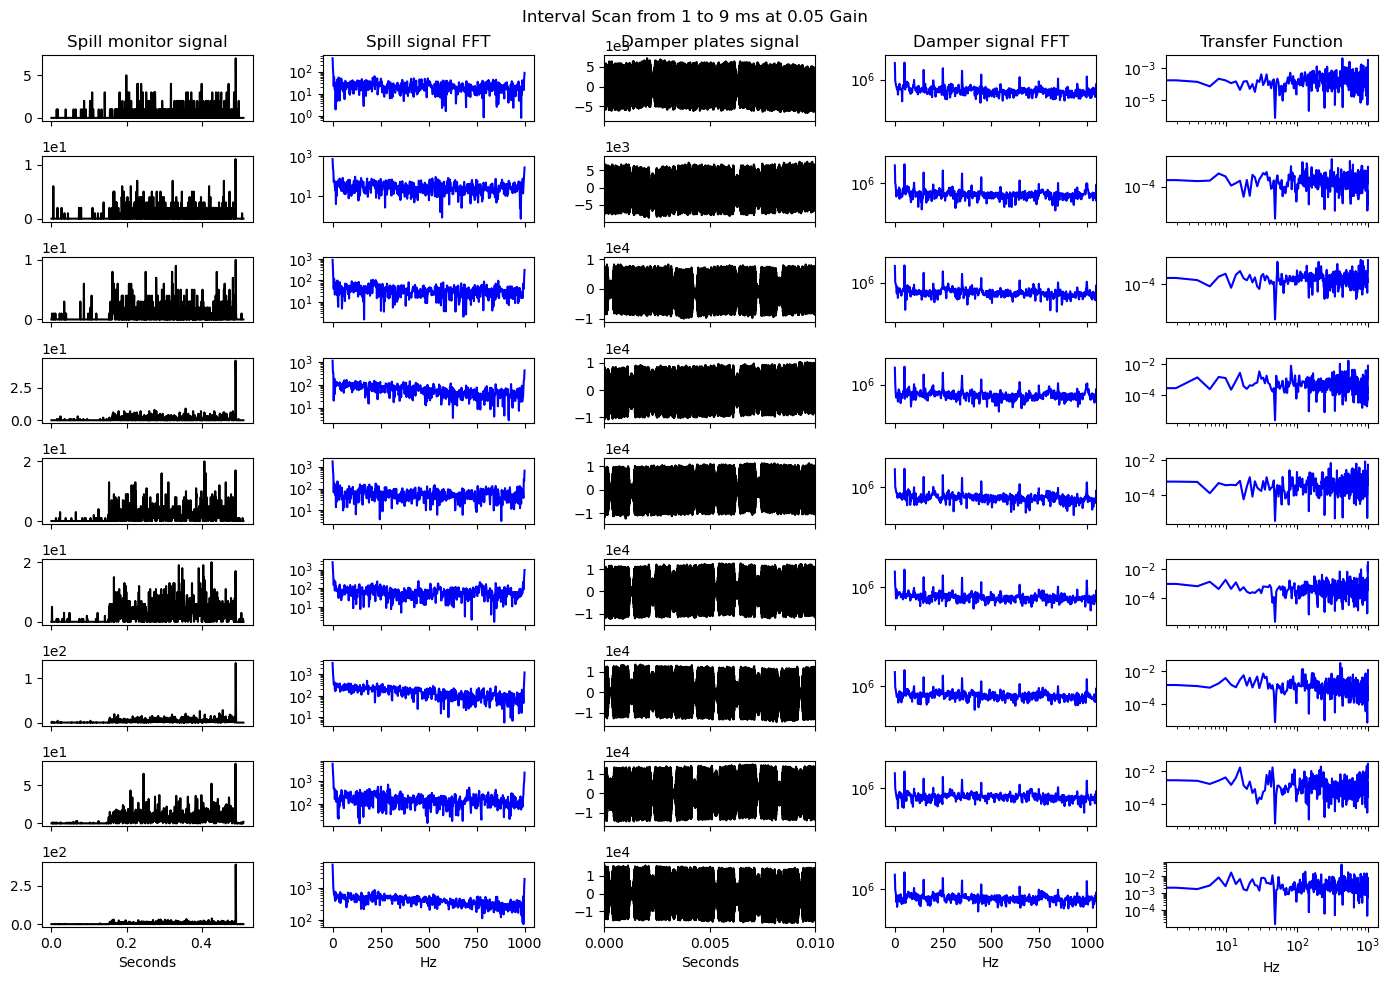

In [15]:
dir = "../results/2022-11-23T11:04:28"

files = os.listdir(dir)

scope0_files = [f for f in files if f.startswith('scope_0') and f.endswith('.pkl')]
scope1_files = [f for f in files if f.startswith('scope_1') and f.endswith('.pkl')]
cal1000_files = [f for f in files if f.startswith('BXSCAL_1000_signal') and f.endswith('.pkl')]
cal1100_files = [f for f in files if f.startswith('BXSCAL_1100_signal') and f.endswith('.pkl')]
int1000_files = [f for f in files if f.startswith('BXSCINT_1000') and f.endswith('.pkl')]
int1001_files = [f for f in files if f.startswith('BXSCINT_1001') and f.endswith('.pkl')]
qmeter_files = [f for f in files if f.startswith('qmeter_') and f.endswith('.pkl')]
blm_files = [f for f in files if f.startswith('blm_') and f.endswith('.pkl')]

scope0_files.sort()
scope1_files.sort()
cal1000_files.sort()
cal1100_files.sort()
int1000_files.sort()
int1001_files.sort()
qmeter_files.sort()
blm_files.sort()

initial = pkl.load(open(f"{dir}/initial.pkl", 'rb'))

scope0 = [pkl.load(open(f"{dir}/{f}", 'rb')) for f in scope0_files[1:]]
scope1 = [pkl.load(open(f"{dir}/{f}", 'rb')) for f in scope1_files[1:]]
cal1000 = [pkl.load(open(f"{dir}/{f}", 'rb')) for f in cal1000_files[1:]]
cal1100 = [pkl.load(open(f"{dir}/{f}", 'rb')) for f in cal1100_files[1:]]
int1000 = [pkl.load(open(f"{dir}/{f}", 'rb')) for f in int1000_files[1:]]
int1001 = [pkl.load(open(f"{dir}/{f}", 'rb')) for f in int1001_files[1:]]
qmeter = [pkl.load(open(f"{dir}/{f}", 'rb')) for f in qmeter_files[1:]]
blm = [pkl.load(open(f"{dir}/{f}", 'rb')) for f in blm_files[1:]]

scope_time_per_sample = scope0[0]['data']['time'][-1] * 1e-09 / len(scope0[0]['data']['time'])
scope_sample_rate = 1/scope_time_per_sample

fig, ax = plt.subplots(len(int1000), 5, figsize=(14, 10), sharex='col', tight_layout=True)

tf_df = pd.DataFrame(columns=['Frequency', 'Damper', 'Spill'])


for i, (param, int1k, scp) in enumerate(list(zip(initial['param_space'], int1000, scope0))):

    fifofreq = int1k['EaConfig']['fifoFreq']

    int_data = int1k['countArray']
    int_time_reconstructed = np.arange(0, len(int_data) * 1/fifofreq, 1/fifofreq)
    ax[i, 0].plot(int_time_reconstructed, int_data, 'k')
    ax[i, 0].ticklabel_format(style='sci', axis='y', scilimits=(0, 0))

    int_yf = rfft(int_data)
    int_xf = rfftfreq(len(int_data), 1/fifofreq)
    ax[i, 1].plot(int_xf, np.abs(int_yf), 'b')
    ax[i, 1].ticklabel_format(style='sci', axis='y', scilimits=(0, 0))
    ax[i, 1].set_yscale('log')

    scp_time = np.array(scp['data']['time']) * 1e-9 # convert to seconds
    scp_timeRebase = scp_time - scp_time[0]
    scp_data = np.array(scp['data']['value'])
    ax[i, 2].plot(scp_timeRebase, scp_data, 'k')
    ax[i, 2].ticklabel_format(style='sci', axis='y', scilimits=(0, 0))
    ax[i, 2].set_xlim(0, 1e-2)
    ax[i, 2].set_xticks([0, 0.005, 0.01])

    scp_window = get_window
    scp_yf = rfft(scp_data)
    scp_xf = rfftfreq(len(scp_data), scope_time_per_sample)
    ax[i, 3].plot(scp_xf, np.abs(scp_yf), 'b')
    ax[i, 3].set_yscale('log')
    ax[i, 3].set_xlim(-50, 1050)

    ax[i, 4].loglog(int_xf, np.abs(int_yf) / np.abs(scp_yf)[:len(int_xf)], 'b')

    if initial['knob'] == 'interval':
        ax[i, 0].set_ylabel(f"{param} ms")
        ax[i, 1].axvline(1/(param * 1e-3), color='r', linestyle=':', alpha=0.5)
        ax[i, 3].axvline(1/(param * 1e-3), color='r', linestyle=':', alpha=0.5)

    driving_freq = np.round_(1/(param*1e-3), 0)
    # try:
    #     spill_sig_at_driving_freq = np.abs(int_yf[np.round_(int_xf, 0) == driving_freq][0])
    # except IndexError:
    #     spill_sig_at_driving_freq = np.abs((int_yf[np.round_(int_xf, 0) == driving_freq+1][0] + int_yf[np.round_(int_xf, 0) == driving_freq-1][0])/2)
    # try:
    #     damper_sig_at_driving_freq = np.abs(scp_yf[np.round_(scp_xf, 0) == driving_freq][0])
    # except IndexError:
    #     damper_sig_at_driving_freq = np.abs((scp_yf[np.round_(scp_xf, 0) == driving_freq+1][0] + scp_yf[np.round_(scp_xf, 0) == driving_freq-1][0])/2)

    # tf_df = pd.concat([tf_df, pd.DataFrame.from_records([{'Frequency': driving_freq, 'Damper': damper_sig_at_driving_freq, 'Spill': spill_sig_at_driving_freq}])], ignore_index=True)


ax[0, 0].set_title('Spill monitor signal')
ax[0, 1].set_title('Spill signal FFT')

ax[0, 2].set_title('Damper plates signal')
ax[0, 3].set_title('Damper signal FFT')

ax[0, 4].set_title('Transfer Function')

ax[i, 0].set_xlabel("Seconds")
ax[i, 1].set_xlabel("Hz")

ax[i, 2].set_xlabel("Seconds")
ax[i, 3].set_xlabel("Hz")

ax[i, 4].set_xlabel("Hz")

gain = initial['qmeter_settings']['ex_h_amplitude'][1]
plt.suptitle(f"Interval Scan from 1 to 9 ms at {gain} Gain")

plt.tight_layout(pad=0.8, w_pad=0.1, h_pad=0.4)


# Test